In [20]:
import netCDF4 as nc
import sys, os, argparse
import time
import numpy as np
from numpy import ma as ma

#Import packages for plotting
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.animation as animation
from matplotlib.ticker import MaxNLocator
from pylab import imshow,cm

#Import packages for clustering
from sklearn.cluster import KMeans
from scipy.linalg import eigh

#Import packages for geodesic distences
from pyproj import Geod

# Import package for parallel computing
from joblib import Parallel, delayed

from scipy.interpolate import griddata



In [21]:
'''
# Create the parser
parser = argparse.ArgumentParser(description="Process some parameters for clustering.")
# Add required arguments
parser.add_argument("Ncores", type=int, help="Number of CPU's")
parser.add_argument("file_path", type=str, help="Path to the file")
parser.add_argument("geo_file_path", type=str, help="Path to the file")
parser.add_argument("parent_directory", type=str, help="Parent directory")
parser.add_argument("results_directory", type=str, help="Results directory")
parser.add_argument("tmin", type=int, help="Minimum time")
parser.add_argument("tmax", type=int, help="Maximum time")
parser.add_argument("lat_resolution", type=float, help="Lat resolution for the IC grid in degrees")
parser.add_argument("lon_resolution", type=float, help="Lon resolution for the IC grid in degrees")
parser.add_argument("dt", type=float, help="Time step size for Runge Kutta")
parser.add_argument("DT", type=float, help="Time step size for Fmap")
parser.add_argument("geodesic", type=lambda x: x.lower() == 'true', help="Geodesic boolean for trajectory distance")
# Add optional argument with a default value
parser.add_argument("--freq", type=int, default=10, help="Frequency (default: 10)")
parser.add_argument("--K", type=int, default=1000, help="K similarity diagonal (default: 1000)")
parser.add_argument("--n_clusters", type=int, default=0, help="Number of clusters (default: 0 which gives the default number)")
parser.add_argument("--e", type=float, default=0, help="Sparsification parameter (default: 0 which translates to standard deviation)")
# Parse the arguments
args = parser.parse_args()


Ncores = args.Ncores
file_path = args.file_path
geo_file_path = args.geo_file_path
parent_directory = args.parent_directory
results_directory = args.results_directory
tmin = args.tmin
tmax = args.tmax
lat_resolution = args.lat_resolution
lon_resolution = args.lon_resolution
dt = args.dt
DT = args.DT
geodesic = args.geodesic
freq = args.freq
K = args.K
n_clusters = args.n_clusters
e = args.e
k_exp = 20

if not os.path.exists(results_directory):
    os.makedirs(results_directory)
'''

'\n# Create the parser\nparser = argparse.ArgumentParser(description="Process some parameters for clustering.")\n# Add required arguments\nparser.add_argument("Ncores", type=int, help="Number of CPU\'s")\nparser.add_argument("file_path", type=str, help="Path to the file")\nparser.add_argument("geo_file_path", type=str, help="Path to the file")\nparser.add_argument("parent_directory", type=str, help="Parent directory")\nparser.add_argument("results_directory", type=str, help="Results directory")\nparser.add_argument("tmin", type=int, help="Minimum time")\nparser.add_argument("tmax", type=int, help="Maximum time")\nparser.add_argument("lat_resolution", type=float, help="Lat resolution for the IC grid in degrees")\nparser.add_argument("lon_resolution", type=float, help="Lon resolution for the IC grid in degrees")\nparser.add_argument("dt", type=float, help="Time step size for Runge Kutta")\nparser.add_argument("DT", type=float, help="Time step size for Fmap")\nparser.add_argument("geodesi

In [22]:

K=1000
Ncores = 10
geo_file_path = "/home/llu/Data/OPA-neXtSIM_CREG025_ILBOXE140_2010_ice_latlon_rot_jacob.nc"
parent_directory = "/home/llu/Programs/HPC_Spectral_Clustering/"
tmin = 0
tmax = 360
lat_resolution = 0.25
lon_resolution = 0.25
dt = 1
DT = 10
freq = 1
timemod = int(DT/dt) #10
geodesic=False
n_clusters=0
e=0
k_exp = 20
thereshold=1

Cluster_params = (
    f"geodesic_{geodesic}_"
    f"nclusters{n_clusters}_"
    f"e{e}"
)

W_params = (
    f"geodesic_{geodesic}"
)


# Initial file path
file_path = "/home/llu/Data/Fmap_tmin0_tmax360_latlonres0.25x0.25_dt1_DT10/"
# Construct results directory path
results_directory = f"{file_path}/{Cluster_params}/"
if not os.path.exists(results_directory):
    os.makedirs(results_directory)


In [23]:
# add utils and subfunctions folders to current working path
sys.path.append(parent_directory+"/subfunctions/border_calculation")

In [24]:
# Import function to compute pairwise distances between trajectories
from ipynb.fs.defs.calculating_borders import calculating_borders

In [25]:
print("Reading data")
#Read input data

file_path="/home/llu/Programs/HPC_Spectral_Clustering/Data/Fmap_tmin0_tmax360_latlonres1x1_dt0.1_DT2/geodesic_False_nclusters0_e0/"

Fmap_path = file_path+'Fmap_geodesic_False_nclusters0_e0.0.npy'
labels_path = file_path+'/Clusters_labels_geodesic_False_nclusters0_e0.0.npy'

# Load the Fmap array from the file
Fmap = np.load(Fmap_path)  # ntime [lon,lat] ntrajectories
IC = Fmap[0,:,:]  #Take the position of the trajectory IC
# Load the labels of the clusters
labels= np.load(labels_path)

dataset = nc.Dataset(geo_file_path, mode='r')

#from m/s to m/day
siu = dataset.variables['vlon'][0,:,:]
siv = dataset.variables['vlat'][0,:,:]
land_mask=siu[:,:].mask
# Access coordinates
latitude = dataset.variables['rot_lat'][:]  
longitude = dataset.variables['rot_lon'][:]
dataset.close()


Reading data


In [26]:
borders=calculating_borders(IC, labels, geodesic, thereshold, Ncores)


Preparing the parallel loop to compute the Similarity matrix
Dimensions of W triangular
490545.0
Length of the array with w values
(49055,)
Computing the similarity matrix with the parallel loop
0
0
0
0
0
0
0
0
0
0
10000
10000
10000
20000
20000
10000
10000
10000
10000
10000
10000
10000


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


30000
30000
40000
40000
20000
20000
20000
20000
20000
20000
20000
20000
30000
30000
40000
40000


[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.7s remaining:    1.5s


30000
30000
40000
30000
40000
30000
30000
30000


[Parallel(n_jobs=10)]: Done   5 out of  10 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    1.1s remaining:    0.5s


40000
40000
40000
40000


[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    1.2s finished


/tmp/ipykernel_37897/3821644689.py:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  axes[0].pcolormesh(longitude, latitude, land_mask, cmap=custom_cmap, alpha=1)
/tmp/ipykernel_37897/3821644689.py:41: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = axes[1].pcolor(longitude,latitude,grid_borders,cmap="Blues",alpha=1)
/tmp/ipykernel_37897/3821644689.py:46: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=axes[1

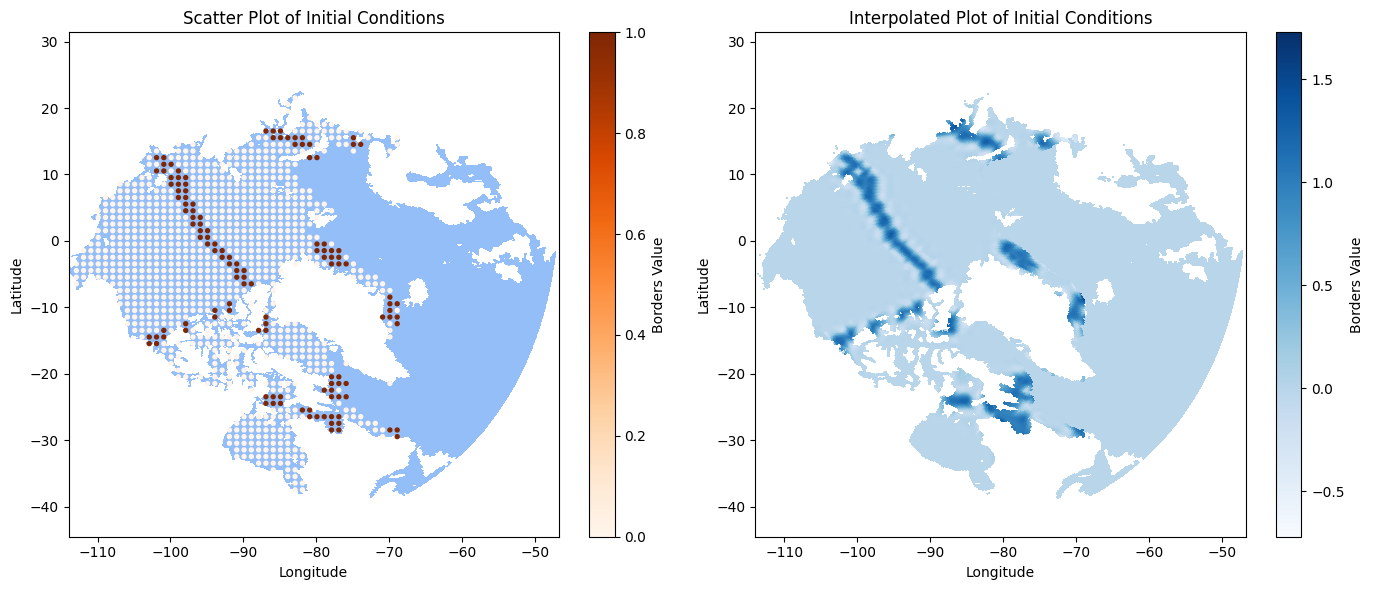

In [27]:

# Extract latitude and longitude
longitudes = IC[0, :]
latitudes = IC[1, :]

# Create a grid for interpolation
grid_lon, grid_lat = np.mgrid[min(longitudes):max(longitudes):100j, min(latitudes):max(latitudes):100j]
# Interpolate the data
grid_borders=griddata((longitudes, latitudes), borders, (longitude, latitude), method='cubic')
grid_borders=np.ma.masked_array(grid_borders, land_mask)

# Initialize the vel_land_mask array with False
water_mask = np.full(latitude.shape, False, dtype=bool)
# Compute indices where the velocity is 0 
zero_indices = np.where((siu[:,:] == 0) & (siv[:,:] == 0))
# Set the specified indices to True
water_mask[zero_indices] = True

grid_borders[water_mask]=0

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define color map for the landmask
colors_mask = [(0.58, 0.747, 0.972),
        (1, 1, 1)]  # Grey (RGB for white)  # Light blue (RGB for light sky blue)
# Create the colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("GreyToBlue", colors_mask)
colors_mask = plt.get_cmap(custom_cmap, 2)


# Scatter plot
axes[0].pcolormesh(longitude, latitude, land_mask, cmap=custom_cmap, alpha=1)
im = axes[0].scatter(longitudes, latitudes, c=borders, cmap='Oranges', s=8)
axes[0].set_title('Scatter Plot of Initial Conditions')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
fig.colorbar(im, ax=axes[0], label='Borders Value')

# Interpolated plot
#axes[1].scatter(longitude.ravel(), latitude.ravel(),marker='.',s=0.1,c=land_mask.ravel(), cmap=colors_mask)
im = axes[1].pcolor(longitude,latitude,grid_borders,cmap="Blues",alpha=1)
#s=axes[1].pcolormesh(longitude, latitude, land_mask, cmap=colors_mask)
axes[1].set_title('Interpolated Plot of Initial Conditions')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
fig.colorbar(im, ax=axes[1], label='Borders Value')
# Adjust layout
plt.tight_layout()
# Show plot
plt.show()

#extent=(min(longitudes), max(longitudes), min(latitudes), max(latitudes)),

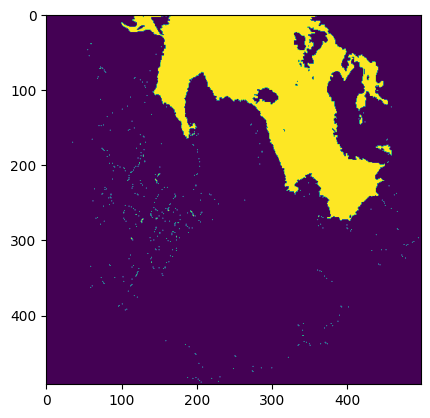

In [28]:
imshow(water_mask)

In [29]:
for  :



    grid_borders=[]
    borders=calculating_borders(IC, labels, geodesic, thereshold, Ncores)
    # Extract latitude and longitude
    longitudes = IC[0, :]
    latitudes = IC[1, :]

    # Create a grid for interpolation
    grid_lon, grid_lat = np.mgrid[min(longitudes):max(longitudes):100j, min(latitudes):max(latitudes):100j]
    # Interpolate the data
    grid_borders+=griddata((longitudes, latitudes), borders, (longitude, latitude), method='cubic')



#make a loop in tge IC and labels
#calculate grid_borders and add the matrix to eahc other
#Devide by the amount of set ups.


SyntaxError: invalid syntax (1005108217.py, line 1)